In [1]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train:  (50000, 32, 32, 3)


In [2]:
#accuracy calculation
def accuracy(y_pred,y):
        batch_size=y_pred.shape[0] # number of input data
        acc=(1/batch_size)*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()
        return acc

In [5]:
H=200
std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500
#stohastic gradient descent
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
train_loss_history = []
test_loss_history = []
train_acc_history = []
val_acc_history = []
accumulated_batch_loss_history=[]
batch_loss_history=[]

seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices=np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    accumulated_batch_loss=0
    for i in range(0,Ntr,batch_size):
        j= i+batch_size
        # Forward pass
        h=1.0/(1.0+np.exp(-(x[i:j].dot(w1)+b1)))
        y_pred=h.dot(w2)+b2
        batch_loss= (1./(batch_size))*np.square(y_pred-y[i:j]).sum() + reg*(np.sum(w1*w1)+np.sum(w2*w2))
        batch_loss_history.append(batch_loss)
        accumulated_batch_loss += batch_loss

        # Backward pass
        dy_pred=(1./batch_size)*2.0*(y_pred-y[i:j])
        dw2=h.T.dot(dy_pred) + reg*w2
        db2=dy_pred.sum(axis=0)
        dh=dy_pred.dot(w2.T)
        dw1=x[i:j].T.dot(dh*h*(1-h)) + reg*w1
        db1=(dh*h*(1-h)).sum(axis=0)
        w1 -= lr*dw1
        b1 -= lr*db1
        w2 -= lr*dw2
        b2 -= lr*db2
        lr *= lr_decay
    accumulated_batch_loss_history.append(accumulated_batch_loss)
    #train loss calculation from batchwise updated w and b matrices #does not affeect learning
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    train_loss= (1./(Ntr))*np.square(y_pred-y).sum() + reg*(np.sum(w1*w1)+np.sum(w2*w2))
    train_loss_history.append(train_loss)

    #validating for test data #does not affeect learning
    h_test=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_test=h_test.dot(w2)+b2
    test_loss= (1./Nte)*np.square(y_pred_test-y_test).sum() + reg*(np.sum(w1*w1)+np.sum(w2*w2))########
    test_loss_history.append(test_loss)
    
    #accuracies #does not affect learning of the model
    train_acc=accuracy(y_pred,y)
    train_acc_history.append(train_acc)
    test_acc=accuracy(y_pred_test,y_test)
    val_acc_history.append(test_acc)
    #batch_loss_Ntr=batch_loss/1000
    if t%10==0:
        print('%d / %d: train loss:%f accumulated_batch_loss: %f final_batch_loss: %f test_loss:%f train_acc:%f test_acc:%f' % (t, iterations,train_loss, accumulated_batch_loss,batch_loss,test_loss,train_acc,test_acc))
    
    
    lr *= lr_decay

    

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
0 / 300: train loss:0.800701 accumulated_batch_loss: 84.251255 final_batch_loss: 0.797795 test_loss:0.802114 train_acc:0.359820 test_acc:0.358500
10 / 300: train loss:0.677293 accumulated_batch_loss: 68.763173 final_batch_loss: 0.692584 test_loss:0.738253 train_acc:0.541220 test_acc:0.460500
20 / 300: train loss:0.622029 accumulated_batch_loss: 62.991455 final_batch_loss: 0.619641 test_loss:0.734817 train_acc:0.615120 test_acc:0.465600
30 / 300: train loss:0.600290 accumulated_batch_loss: 60.424849 final_batch_loss: 0.592907 test_loss:0.735674 train_acc:0.645220 test_acc:0.469100
40 / 300: train loss:0.592620 accumulated_batch_loss: 59.444078 final_batch_loss: 0.613710 test_loss:0.736829 train_acc:0.655400 test_acc:0.467600
50 / 300: train loss:0.589898 accumulated_batch_loss: 59.072942 final_batch_loss: 0.608140 test_loss:0.737195 train_acc:0.658780 test_acc:0.467500
60 / 300: train loss:0.589000 accumulated_batch_loss: 58.933536 fina

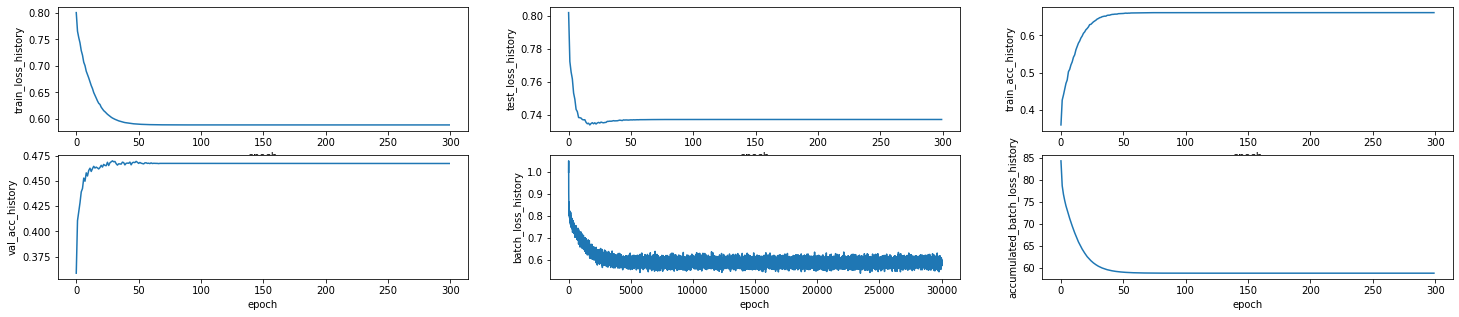

In [10]:
history_lists=[train_loss_history,test_loss_history,train_acc_history,val_acc_history,batch_loss_history,accumulated_batch_loss_history]
titles=['train_loss_history','test_loss_history','train_acc_history','val_acc_history','batch_loss_history','accumulated_batch_loss_history']
fig,ax=plt.subplots(2,3,figsize=(25,5))
for i in range(2):
        for j in range(3):
                ax[i][j].plot(history_lists[(3*i)+j])
                ax[i][j].set_ylabel(titles[(3*i)+j])
                ax[i][j].set_xlabel("epoch")
                ax[i][j].plot()